In [0]:
import numpy as np

In [101]:
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

"""
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")
"""



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'\nX_test = np.load("X_test.npy")\ny_test = np.load("y_test.npy")\nperson_train_valid = np.load("person_train_valid.npy")\nX_train_valid = np.load("X_train_valid.npy")\ny_train_valid = np.load("y_train_valid.npy")\nperson_test = np.load("person_test.npy")\n'

In [0]:
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
prefix = "/content/drive/My Drive/"
X_test = np.load(prefix + "X_test.npy")
y_test = np.load(prefix + "y_test.npy")
person_train_valid = np.load(prefix + "person_train_valid.npy")
X_train_valid = np.load(prefix + "X_train_valid.npy")
y_train_valid = np.load(prefix + "y_train_valid.npy")
person_test = np.load(prefix + "person_test.npy")

transpose = False
""" TRANSPOSE """
if transpose:
    X_train_valid = np.transpose(X_train_valid, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


### Shape of data

In [103]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))



Training/Valid data shape: (2115, 25, 1000)
Test data shape: (443, 25, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


# Remove last 3 channels

In [0]:
if transpose:
    X_train_valid = np.delete(X_train_valid, np.s_[22:], axis=2)
    X_test = np.delete(X_test, np.s_[22:], axis=2)
else:
    X_train_valid = np.delete(X_train_valid, np.s_[22:], axis=1)
    X_test = np.delete(X_test, np.s_[22:], axis=1)

In [105]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


# Resuming preprocessing...

### Standardization: every channel gets a mean and std dev across all time bins and samples

In [0]:
standardize = False

In [0]:
if standardize:
    """ OPTIONAL TO RUN """
    # standardize across all data 
    if transpose:
        num_samples, num_bins, num_channels = X_train_valid.shape
    else:
        num_samples, num_channels, num_bins = X_train_valid.shape
    num_test_samples = X_test.shape[0]
    means = [] # index indicates channel
    std_devs = []
    thisSum = 0

    # get means
    for i in range(num_channels):
        thisSum = 0
        for j in range(num_samples + num_test_samples):
            for k in range(num_bins):
                if j < num_samples: # get from train/valid set 
                    thisSum += X_train_valid[j][k][i]
                else: # get from test set
                    thisSum += X_test[j-num_samples][k][i]
        means.append(thisSum / ((num_samples + num_test_samples)*num_bins))
        print(means[i])

    # get std devs 
    tmp = 0
    for i in range(num_channels):
        thisSum = 0
        for j in range(num_samples + num_test_samples):
            for k in range(num_bins):
                if j < num_samples: # get from train/valid set 
                    thisSum += (X_train_valid[j][k][i] - means[i])**2
                else: # get from test set
                    thisSum += (X_test[j-num_samples][k][i] - means[i])**2
        tmp = thisSum / ((num_samples + num_test_samples)*num_bins)
        std_devs.append(np.sqrt(tmp))
        print(std_devs[i])
    

In [0]:
if standardize:
    """ OPTIONAL TO RUN """
    # print means and std devs so you dont have to do for loop again
    print(means)
    print(std_devs)

In [0]:
if standardize:
    # set means, std_devs
    means = [0.24706498683663997, 0.29313554443168494, 0.2828193909120895, 0.2836442960809226, 0.28152991228498825, 0.3077003174782545, 0.3744230722243941, 0.3553291947138878, 0.29904645810936276, 0.28901048411234365, 0.286649191873534, 0.32929849751392687, 0.3410243674868061, 0.37840727924648165, 0.3727627441788018, 0.37829269158644446, 0.31371026177067046, 0.33319172922571344, 0.2970165977448202, 0.3461631172424746, 0.3622499610596658, 0.33083847320294174]

    std_devs = [11.230263244641073, 10.233296507827058, 10.90975275266063, 11.483403098109935, 11.202650478466019, 10.880442182604929, 8.713139254994436, 10.064753939480944, 10.694670003031371, 11.336495594434043, 10.979137249291673, 10.896807622386243, 10.108512304596564, 10.333026920981442, 10.641437047832842, 11.098857594037897, 10.994570838557536, 11.102551197490161, 10.798327657785737, 11.241502209783333, 11.164537611117643, 11.342013636811844]

In [0]:
if standardize:
    # standardize data  
    for i in range(num_channels):
        X_train_valid[:][:][i] -= means[i] 
        X_train_valid[:][:][i] /= std_devs[i]
        X_test[:][:][i] -= means[i] 
        X_test[:][:][i] /= std_devs[i]

### For windows smaller than the original 4 seconds, generate many more samples by cropping the data and sliding the window over each original sample, and have samples of shorter time bins 

In [0]:
augment = False

In [0]:
if augment:
    # initialize new arrays
    if transpose:
        num_samples, num_bins, num_channels = X_train_valid.shape
        
    else:
        num_samples, num_channels, num_bins = X_train_valid.shape

    original_window_size = 4 # in seconds

    window_size = 1 # default 2. in seconds 

    num_test_samples = X_test.shape[0]

    #new_num_samples = original_window_size // window_size
    stride = 75 # default 50
    new_num_bins = num_bins // (original_window_size // window_size)
    new_samples_per_sample = (num_bins - (num_bins // (original_window_size // window_size))) // stride
    new_num_samples = (num_samples * new_samples_per_sample) 
    new_num_test_samples = (num_test_samples * new_samples_per_sample)


    if transpose:
      new_X_train_valid = np.zeros((new_num_samples, new_num_bins, num_channels))
      new_X_test = np.zeros((new_num_test_samples, new_num_bins, num_channels))
      new_y_train_valid = np.zeros(new_num_samples)
      new_y_test = np.zeros(new_num_test_samples)
      new_person_train_valid = np.zeros((new_num_samples, 1))
      new_person_test = np.zeros((new_num_test_samples, 1))
    else:
      new_X_train_valid = np.zeros((new_num_samples, num_channels, new_num_bins))
      new_X_test = np.zeros((new_num_test_samples, num_channels, new_num_bins))
      new_y_train_valid = np.zeros(new_num_samples)
      new_y_test = np.zeros(new_num_test_samples)
      new_person_train_valid = np.zeros((new_num_samples, 1))
      new_person_test = np.zeros((new_num_test_samples, 1))      

In [0]:
if augment:
  print('stride: ', stride)
  print('new number of bins: ', new_num_bins)
  print('new samples per sample: ', new_samples_per_sample)
  print('new number of train/valid samples: ', new_num_samples)
  print('new number of test samples: ', new_num_test_samples)

In [0]:
if augment:
    print(new_X_train_valid.shape)
    print(new_X_test.shape)
    print(new_y_train_valid.shape)
    print(new_y_test.shape)
    print(new_person_train_valid.shape)
    print(new_person_test.shape)

In [0]:
if augment:
  if transpose:
    # train/valid first
    for sample in range(num_samples):
        #for time_bin in range(num_bins):
        for i in range(new_samples_per_sample + 1):
            #new_X_train_valid[sample*new_samples_per_sample + i][:][:] = X_train_valid[sample][i : i + new_samples_per_sample][:]
            #print(i)
            try:
                code = 0
                new_X_train_valid[sample*(new_samples_per_sample) + i][:][:] = X_train_valid[sample][i*stride : i*stride + new_num_bins][:]
                code = 1
                new_y_train_valid[sample*(new_samples_per_sample) + i] = y_train_valid[sample]
                code = 2
                new_person_train_valid[sample*(new_samples_per_sample) + i] = person_train_valid[sample]
                #print(i*stride, i*stride + new_samples_per_sample)
            except:
                #pass
                print(code, sample, i)

    # test 
    for sample in range(num_test_samples):
        #for time_bin in range(num_bins):
        for i in range(new_samples_per_sample + 1):
            #new_X_train_valid[sample*new_samples_per_sample + i][:][:] = X_train_valid[sample][i : i + new_samples_per_sample][:]
            #print(i)
            try:
                code = 0
                new_X_test[sample*(new_samples_per_sample) + i][:][:] = X_test[sample][i*stride : i*stride + new_num_bins][:]
                code = 1
                new_y_test[sample*(new_samples_per_sample) + i] = y_test[sample]
                code = 2
                new_person_test[sample*(new_samples_per_sample) + i] = person_test[sample]
                #print(i*stride, i*stride + new_samples_per_sample)
            except:
                #pass
                print(code, sample, i)
                
                
  else: # NOT transpose
    print("NOT transpose")
    
    # train/valid
    for sample in range(num_samples):
      for i in range(new_samples_per_sample + 1):
        try:
          code = 0
          #print('slice: ', i*stride, ' to ', i*stride + new_num_bins, ' - extractant shape: ', X_train_valid.shape, ' - extract slice: ', 
          #     X_train_valid[sample, 5:10, 5:20].shape)
          new_X_train_valid[sample*(new_samples_per_sample) + i][:][:] = X_train_valid[sample, :, i*stride : i*stride + new_num_bins]
          code = 1
          new_y_train_valid[sample*(new_samples_per_sample) + i] = y_train_valid[sample]
          code = 2
          new_person_train_valid[sample*(new_samples_per_sample) + i] = person_train_valid[sample]
        except Exception as e:
          print(code, e, sample, i, 'train')
          
    # test
    for sample in range(num_test_samples):
      for i in range(new_samples_per_sample + 1):
        try:
          new_X_test[sample*(new_samples_per_sample) + i][:][:] = X_test[sample, :, i*stride : i*stride + new_num_bins]
          new_y_test[sample*(new_samples_per_sample) + i] = y_test[sample]
          new_person_test[sample*(new_samples_per_sample) + i] = person_test[sample]
        except:
          print(sample, i, 'test')

In [0]:
if augment:
    new_y_train_valid = new_y_train_valid.astype(int)
    new_y_test = new_y_test.astype(int)
    new_person_train_valid = new_person_train_valid.astype(int)
    new_person_test = new_person_test.astype(int)
    

In [0]:
if augment:
    X_train_valid = new_X_train_valid
    X_test = new_X_test
    y_train_valid = new_y_train_valid
    y_test = new_y_test
    person_train_valid = new_person_train_valid
    person_test = new_person_test

### Take last 3 seconds?

In [0]:
trim = True

In [0]:
if trim and transpose:
  X_train_valid = np.delete(X_train_valid, np.s_[:250], 1)
  X_test = np.delete(X_test, np.s_[:250], 1)

  print('New shapes: \n')
  print(X_train_valid.shape)
  print(X_test.shape)

### Continue from old preprocessing

In [0]:
from collections import Counter

c = Counter(y_train_valid)
d = Counter(person_train_valid[:,0])

In [121]:
print(c)
print(d)

Counter({771: 543, 772: 530, 769: 529, 770: 513})
Counter({6.0: 238, 0.0: 237, 1.0: 236, 2.0: 236, 5.0: 236, 4.0: 235, 3.0: 234, 7.0: 232, 8.0: 231})


X_train_valid: 2115 trials. Each trial has 25 channels across 1000 time bins.

X_test: 443 trials. (same as X_train_valid)

y_train_valid: 2115 labels of 769 (left hand), 770 (right hand), 771 (foot), and 772 (tongue).

y_test: 442 labels as above. 

person_train_valid: 2115 labels of subject IDs 0-9

person_test: 443 subject IDs 0-8

In [0]:
# Splitting data by subject 

from collections import defaultdict

# Make IDs to integers instead of floats
person_train_valid = person_train_valid.astype(int)
person_test = person_test.astype(int)

ids = range(0, 9) # IDs 0-8 inclusive

trials_by_id_train_idx = defaultdict(list) # key: id 0-8, value: list of indices of training data for that id 
trials_by_id_test_idx = defaultdict(list)

if transpose:
    num_trials, num_bins, num_channels = X_train_valid.shape
else:
    num_trials, num_channels, num_bins = X_train_valid.shape
    
num_test = X_test.shape[0]

for i in range(num_trials):
    trials_by_id_train_idx[person_train_valid[i][0]].append(i)
    
for i in range(num_test):
    trials_by_id_test_idx[person_test[i][0]].append(i)
    

In [123]:
# Sanity check to see if partitioning by subject ID worked

print(len(trials_by_id_train_idx[0]))
print(len(person_train_valid[trials_by_id_train_idx[0]]))

print(trials_by_id_train_idx[0])
print(person_train_valid[trials_by_id_train_idx[0]])


237
237
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794

In [124]:
# Sanity check 2
trials_by_id_train_idx.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [0]:
y_train_valid -= 769
y_test -= 769 
# for one hot encoding, convert all values to 0 1 2 3

# Make preprocessed dataset ready for training

In [0]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train_valid_id = defaultdict(np.array)
X_train_id = defaultdict(np.array)
X_valid_id = defaultdict(np.array)
X_test_id = defaultdict(np.array)

y_train_valid_id = defaultdict(np.array)
y_train_id = defaultdict(np.array)
y_valid_id = defaultdict(np.array)
y_test_id = defaultdict(np.array)

y_train_valid_id_1hot = defaultdict(np.array)
y_train_id_1hot = defaultdict(np.array)
y_valid_id_1hot = defaultdict(np.array)
y_test_id_1hot = defaultdict(np.array)



# key: subject ID 0-8, value: trials for that subject
for id in ids:
    #print(id)
    X_train_valid_id[id] = X_train_valid[trials_by_id_train_idx[id]]
    X_test_id[id] = X_test[trials_by_id_test_idx[id]]
    
    
    y_train_valid_id[id] = y_train_valid[trials_by_id_train_idx[id]]
    y_test_id[id] = y_test[trials_by_id_test_idx[id]]
    
    X_train_id[id], X_valid_id[id], y_train_id[id], y_valid_id[id] = train_test_split(X_train_valid_id[id], 
                                                                          y_train_valid_id[id], 
                                                                          test_size=0.2, 
                                                                          random_state=98)

    y_train_id_1hot[id] = to_categorical(y_train_id[id])
    y_valid_id_1hot[id] = to_categorical(y_valid_id[id])
    y_test_id_1hot[id] = to_categorical(y_test_id[id])
    
    y_train_valid_id_1hot[id] = to_categorical(y_train_valid_id[id])
    
    
y_train_valid_1hot = to_categorical(y_train_valid)    

In [127]:
# Sanity check
#print(X_train_valid_id[0].shape)
print(X_train_id[0].shape)
print(X_valid_id[0].shape)
print(y_train_id[0].shape)
print(y_valid_id[0].shape)

(189, 22, 1000)
(48, 22, 1000)
(189,)
(48,)


In [0]:
# (Not separated by ID)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=98)

y_train_1hot = to_categorical(y_train)
y_valid_1hot = to_categorical(y_valid)
y_test_1hot = to_categorical(y_test)

# Model definition

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Embedding, Bidirectional
from keras.layers import LSTM, BatchNormalization
from keras.regularizers import l2
from keras.initializers import glorot_normal, Zeros, Ones, Orthogonal
from keras.optimizers import Adam, Nadam


batch_size = 16
num_epochs = 200

def getModel():
    num_lstm_units = 128
    num_hidden_units = 64
    num_filters = num_lstm_units # default 32
    kernel_size = 4 # default 4
    pool_size = 4 # default 4
    
    reg = 0.001 #default 0.01
    lr = 0.0001  #default 0.001
    decay = 0.0 #default 0.0
    optimizer = Adam(lr=lr, decay=decay)
    
    model = Sequential()
    #model.add(Input(shape=(num_channels, num_bins)))
    
    """1D CONV and POOL""" 
    """
    model.add(Conv1D(filters=128, kernel_size=kernel_size, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=kernel_size, activation='relu'))
    
    model.add(MaxPooling1D(pool_size=pool_size))
    
    model.add(Conv1D(filters=128, kernel_size=kernel_size, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    """
    #model.add(GlobalAveragePooling1D())
    
    
    
    """ PRE-LSTM DENSE """
    """
    model.add(Dense(num_hidden_units, activation='linear',kernel_regularizer=l2(reg),bias_regularizer=l2(reg),activity_regularizer=l2(reg)))
    
    model.add(BatchNormalization(gamma_initializer=Ones(), beta_initializer=Zeros(),
                                gamma_regularizer=l2(reg), beta_regularizer=l2(reg)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    """
    
    
    """ LSTM """
    #model.add(Embedding(max_features, output_dim=256))
    #model.add(LSTM(128, input_shape=(num_bins, num_channels)))
    #model.add(LSTM(num_lstm_units, input_shape=(num_bins, num_channels), return_sequences=True))
    #model.add(LSTM(num_lstm_units, input_shape=(num_channels, num_bins)))
    
    
    model.add(LSTM(num_lstm_units, 
                   #input_shape=(num_bins, num_channels), 
                   input_shape=(num_channels, num_bins),
                   #return_sequences=True, 
                   dropout=0.5, recurrent_dropout=0.5,
                   kernel_regularizer=l2(reg),
                   recurrent_regularizer=l2(reg),
                   bias_regularizer=l2(reg),
                   activity_regularizer=l2(reg),
                   kernel_initializer=Orthogonal(seed=98),#glorot_normal(seed=98),
                   recurrent_initializer=Orthogonal(seed=89),#glorot_normal(seed=98),
                   bias_initializer=Zeros())) 
    

    model.add(BatchNormalization(gamma_initializer=Ones(), beta_initializer=Zeros(),
                                gamma_regularizer=l2(reg), beta_regularizer=l2(reg)))
    
    model.add(Dropout(0.5))
    

    #model.add(LSTM(num_lstm_units, input_shape=(num_channels, num_bins), return_sequences=True))
    
    """
    model.add(LSTM(num_lstm_units, 
                   return_sequences=True,
                   dropout=0.5, recurrent_dropout=0.5,
                   kernel_regularizer=l2(reg),
                   recurrent_regularizer=l2(reg),
                   bias_regularizer=l2(reg),
                   activity_regularizer=l2(reg),
                   kernel_initializer=Orthogonal(seed=180),
                   recurrent_initializer=Orthogonal(seed=360),
                   bias_initializer=Zeros()))
    
    model.add(BatchNormalization(gamma_initializer=Ones(), beta_initializer=Zeros(),
                            gamma_regularizer=l2(reg), beta_regularizer=l2(reg)))

    model.add(Dropout(0.5))
    """
    """
    model.add(LSTM(num_lstm_units, 
                   dropout=0.5, recurrent_dropout=0.5,
                   kernel_regularizer=l2(reg),
                   recurrent_regularizer=l2(reg),
                   bias_regularizer=l2(reg),
                   activity_regularizer=l2(reg),
                   kernel_initializer=Orthogonal(seed=908),
                   recurrent_initializer=Orthogonal(seed=980),
                   bias_initializer=Zeros()))
    
    model.add(BatchNormalization(gamma_initializer=Ones(), beta_initializer=Zeros(),
                            gamma_regularizer=l2(reg), beta_regularizer=l2(reg)))

    model.add(Dropout(0.5))
    """    
    
    #model.add(LSTM(num_lstm_units, input_shape=(num_channels, num_bins), return_sequences=True))
    #model.add(LSTM(num_lstm_units, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    #model.add(Dropout(0.5))
    
    #model.add(LSTM(num_lstm_units, input_shape=(num_channels, num_bins)))
    #model.add(LSTM(num_lstm_units//2, dropout=0.5, recurrent_dropout=0.5))
    #model.add(Dropout(0.5))

    """ POST-LSTM DENSE """
    """
    model.add(Dense(num_hidden_units, activation='linear',kernel_regularizer=l2(reg),bias_regularizer=l2(reg),activity_regularizer=l2(reg)))
    
    model.add(BatchNormalization(gamma_initializer=Ones(), beta_initializer=Zeros(),
                                gamma_regularizer=l2(reg), beta_regularizer=l2(reg)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    """
    
    #model.add(Dense(64, activation='sigmoid'))
    #model.add(Dense(32, activation='sigmoid',kernel_regularizer=l2(reg),bias_regularizer=l2(reg),activity_regularizer=l2(reg)))
    #model.add(Dense(16, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(4, activation='sigmoid'))
    model.add(Dense(4, activation='softmax', kernel_regularizer=l2(reg),bias_regularizer=l2(reg),activity_regularizer=l2(reg)))

    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    #print(model.summary())
    return model




In [95]:
# Using gpu?
# Maybe follow https://www.quantinsti.com/blog/install-tensorflow-gpu
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
from sklearn.model_selection import StratifiedKFold

# Optimize classification accuracy for subject 1. Does it help to train across all subjects?

In [97]:

#print(X_train_valid_id_t.shape)
#model.fit(X_train_valid_id_t, y_train_valid_id_1hot[1], batch_size=16, epochs=10)
#score = model.evaluate(X_test_id_t, y_test_id_1hot[1], batch_size=16)
num_trials1 = 3
scores1 = []
models1 = []
histories1 = []




kf = StratifiedKFold(n_splits = num_trials1)

for train, valid in kf.split(X_train_valid_id[1], y_train_valid_id[1]): # for subject 1's training data
  this_X_train_id, this_X_valid_id = X_train_valid_id[1][train], X_train_valid_id[1][valid] 
  this_y_train_id_1hot, this_y_valid_id_1hot = y_train_valid_id_1hot[1][train], y_train_valid_id_1hot[1][valid]
  
  model = getModel()
  
  history = model.fit(this_X_train_id, this_y_train_id_1hot, batch_size=batch_size, epochs=num_epochs,
             validation_data=(this_X_valid_id, this_y_valid_id_1hot), # just included to track val loss
             verbose=1) # default verbose=1
  
  _, score = model.evaluate(this_X_valid_id, this_y_valid_id_1hot, batch_size=batch_size)
  scores1.append(score)
  models1.append(model)
  histories1.append(history)
  print('########## TEST ACCURACY ', score)

""" OLD BAGGING/EVAL METHOD """
"""
#num_train = len(X_train_id[1])
#bag_idx_size = int(num_train * 0.2) # https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2014-185.pdf

for i in range(num_trials1):
    model = getModel()
    
    bag_idx = np.random.choice(num_train, bag_idx_size)
    
    this_X_train_id = X_train_id[1][bag_idx]
    this_y_train_id_1hot = y_train_id_1hot[1][bag_idx]

    history = model.fit(this_X_train_id, this_y_train_id_1hot, batch_size=batch_size, epochs=num_epochs,
             validation_data=(X_valid_id[1], y_valid_id_1hot[1]),
             verbose=0) # default verbose=1
    _, score = model.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)
    scores1.append(score)
    models1.append(model)
    histories1.append(history)
    print('########## TEST ACCURACY ', score)
"""

Train on 157 samples, validate on 79 samples
Epoch 1/200
157/157 [==============================] - 7s 45ms/step - loss: 3.2320 - acc: 0.2420 - val_loss: 2.5860 - val_acc: 0.2405
Epoch 2/200
157/157 [==============================] - 2s 10ms/step - loss: 2.9576 - acc: 0.3121 - val_loss: 2.4945 - val_acc: 0.2278
Epoch 3/200
157/157 [==============================] - 2s 10ms/step - loss: 2.9633 - acc: 0.2930 - val_loss: 2.3016 - val_acc: 0.2785
Epoch 4/200
157/157 [==============================] - 2s 10ms/step - loss: 3.0525 - acc: 0.2229 - val_loss: 2.1962 - val_acc: 0.2532
Epoch 5/200
157/157 [==============================] - 2s 10ms/step - loss: 2.7256 - acc: 0.2739 - val_loss: 2.3254 - val_acc: 0.2658
Epoch 6/200
157/157 [==============================] - 2s 10ms/step - loss: 2.7396 - acc: 0.2357 - val_loss: 2.3493 - val_acc: 0.2278
Epoch 7/200
157/157 [==============================] - 2s 10ms/step - loss: 2.7331 - acc: 0.2803 - val_loss: 2.2259 - val_acc: 0.2405
Epoch 8/200
157/1

"\n#num_train = len(X_train_id[1])\n#bag_idx_size = int(num_train * 0.2) # https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2014-185.pdf\n\nfor i in range(num_trials1):\n    model = getModel()\n    \n    bag_idx = np.random.choice(num_train, bag_idx_size)\n    \n    this_X_train_id = X_train_id[1][bag_idx]\n    this_y_train_id_1hot = y_train_id_1hot[1][bag_idx]\n\n    history = model.fit(this_X_train_id, this_y_train_id_1hot, batch_size=batch_size, epochs=num_epochs,\n             validation_data=(X_valid_id[1], y_valid_id_1hot[1]),\n             verbose=0) # default verbose=1\n    _, score = model.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)\n    scores1.append(score)\n    models1.append(model)\n    histories1.append(history)\n    print('########## TEST ACCURACY ', score)\n"

In [31]:
sum(scores1) / num_trials1

0.31380504367478695

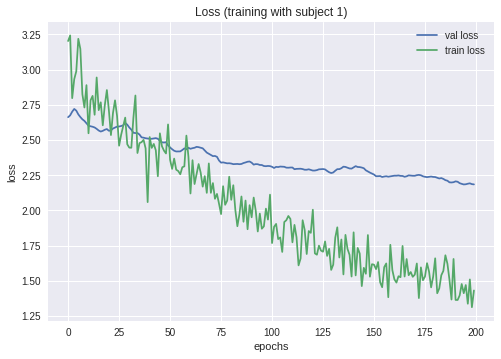

In [32]:
import matplotlib.pyplot as plt
#histories2[0].history['val_loss']
val_loss = histories1[0].history['val_loss'] 
train_loss = histories1[0].history['loss']
x = range(len(val_loss))
y = val_loss

plt.plot(x, y)
plt.plot(x, train_loss)
plt.legend(['val loss', 'train loss'])
#plt.legend(['train loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss (training with subject 1)')
plt.show()

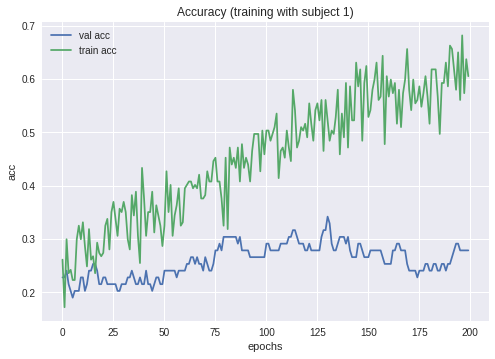

In [33]:
val_acc = histories1[0].history['val_acc']
train_acc = histories1[0].history['acc']
x = range(len(val_loss))

plt.plot(x, val_acc)
plt.plot(x, train_acc)
plt.legend(['val acc', 'train acc'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title('Accuracy (training with subject 1)')
plt.show()

In [34]:
# Try models on test data
test_scores1 = []
for thisModel in models1:
    _, score = thisModel.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)
    test_scores1.append(score)
    print(score)
print('\n')
print('Final test performance: ', np.mean(test_scores1))


50/50 [==============================] - 0s 3ms/step
0.34
50/50 [==============================] - 0s 3ms/step
0.26
50/50 [==============================] - 0s 2ms/step
0.3


Final test performance:  0.30000000000000004


In [35]:
# Train on all subjects, validate on all subjects


num_trials2 = 3
scores2 = []
models2 = []
histories2 = []

"""
kf = StratifiedKFold(n_splits = num_trials2)

for train, valid in kf.split(X_train_valid, y_train_valid): # for ALL SUBJECTS' training data
  this_X_train, this_X_valid = X_train_valid[train], X_train_valid[valid] 
  this_y_train_1hot, this_y_valid_1hot = y_train_valid_1hot[train], y_train_valid_1hot[valid]
  
  model = getModel()
  
  history = model.fit(this_X_train, this_y_train_1hot, batch_size=batch_size, epochs=num_epochs,
             validation_data=(this_X_valid, this_y_valid_1hot), # included to track val loss
             verbose=0) # default verbose=1
  
  _, score = model.evaluate(this_X_valid, this_y_valid_1hot, batch_size=batch_size)
  scores2.append(score)
  models2.append(model)
  histories2.append(history)
  print('########## TEST ACCURACY ', score)
"""


""" OLD BAG METHOD """
"""
num_train = len(X_train)
bag_idx_size = int(num_train * 0.2) # https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2014-185.pdf

for i in range(num_trials2):
    model = getModel()
    
    bag_idx = np.random.choice(num_train, bag_idx_size)
    
    this_X_train = X_train[bag_idx]
    this_y_train_1hot = y_train_1hot[bag_idx]

    history = model.fit(this_X_train, this_y_train_1hot, batch_size=batch_size, epochs=num_epochs,
             validation_data=(X_valid, y_valid_1hot), verbose=0)
    _, score = model.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)
    scores2.append(score)
    models2.append(model)
    histories2.append(history)
    print('########## TEST ACCURACY ', score)
"""

""" SINGLE """

model = getModel()

history = model.fit(X_train, y_train_1hot, batch_size=batch_size, epochs=num_epochs,
                   validation_data=(X_valid, y_valid_1hot), verbose=0)
_, score = model.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)
print('########## TEST ACCURACY ', score)

scores2.append(score)
histories2.append(history)
models2.append(model)

50/50 [==============================] - 0s 2ms/step
########## TEST ACCURACY  0.34


In [36]:
sum(scores2) / num_trials2

0.11333333333333334

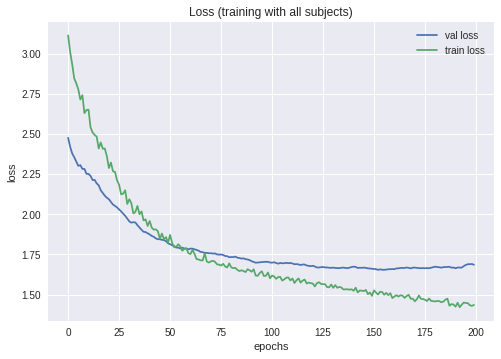

In [37]:
import matplotlib.pyplot as plt
#histories2[0].history['val_loss']
val_loss = histories2[0].history['val_loss'] 
train_loss = histories2[0].history['loss']
x = range(len(val_loss))
y = val_loss

plt.plot(x, y)
plt.plot(x, train_loss)
plt.legend(['val loss', 'train loss'])
#plt.legend(['train loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss (training with all subjects)')
plt.show()

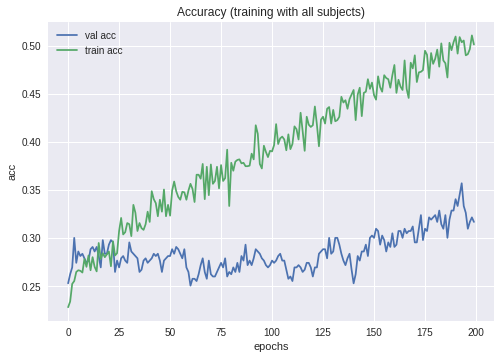

In [38]:
val_acc = histories2[0].history['val_acc']
train_acc = histories2[0].history['acc']
x = range(len(val_loss))

plt.plot(x, val_acc)
plt.plot(x, train_acc)
plt.legend(['val acc', 'train acc'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title('Accuracy (training with all subjects)')
plt.show()

In [39]:
# Try models on test data (just for subject 1)
test_scores2 = []
for thisModel in models2:
    _, score = thisModel.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)
    test_scores2.append(score)
    print(score)
print('\n')
print(np.mean(test_scores2))

50/50 [==============================] - 0s 3ms/step
0.34


0.34


# Optimize classification accuracy across all subjects.

In [36]:
num_subjects = 9
scores3 = []

# Test each model against whole set. Not what you actually have to do
"""
for i in range(len(models2)):
    model = models2[i]

    _, score = model.evaluate(X_test, y_test_1hot, batch_size=batch_size)
    scores3.append(score)
    print('########## TEST ACCURACY ', score)

"""

bestModel = models2[0] # change to best performing model from previous step!

for i in range(9): # For subjects 0-8, evaluate them based on some model bestModel
  _, score = bestModel.evaluate(X_test_id[i], y_test_id_1hot[i], batch_size=batch_size)
  scores3.append(score)
  print('### Subject ' + str(i) + ': ' + str(score))

500/500 [==============================] - 1s 2ms/step
### Subject 0: 0.258
500/500 [==============================] - 1s 2ms/step
### Subject 1: 0.252
500/500 [==============================] - 1s 2ms/step
### Subject 2: 0.288
500/500 [==============================] - 1s 2ms/step
### Subject 3: 0.218
470/470 [==============================] - 1s 2ms/step
### Subject 4: 0.2255319149570262
490/490 [==============================] - 1s 2ms/step
### Subject 5: 0.26938775513245133
500/500 [==============================] - 1s 2ms/step
### Subject 6: 0.222
500/500 [==============================] - 1s 2ms/step
### Subject 7: 0.286
470/470 [==============================] - 1s 2ms/step
### Subject 8: 0.28936170219106877


In [37]:
sum(scores3) / num_subjects

0.2564757080311718

### Ensemble

In [0]:
weights = [model.get_weights() for model in models2]

new_weights = list()

for weights_list_tuple in zip(*weights):
    new_weights.append(
        [np.array(weights_).mean(axis=0)\
            for weights_ in zip(*weights_list_tuple)])
    
ensemble_model = getModel()
ensemble_model.set_weights(new_weights)


In [0]:
# Try Ensemble on col 1
scores4 = []
for i in range(num_trials1):

    
    _, score = ensemble_model.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)
    scores4.append(score)
    print('########## TEST ACCURACY ', score)

50/50 [==============================] - 1s 13ms/step
########## TEST ACCURACY  0.36
50/50 [==============================] - 0s 3ms/step
########## TEST ACCURACY  0.36
50/50 [==============================] - 0s 3ms/step
########## TEST ACCURACY  0.36


In [0]:
sum(scores4)/num_trials

0.36000000000000004

In [0]:
# Try Ensemble on all subjects
scores5 = []
for i in range(9): 
  _, score = ensemble_model.evaluate(X_test_id[i], y_test_id_1hot[i], batch_size=batch_size)
  scores5.append(score)
  print('### Subject ' + str(i) + ': ' + str(score))

50/50 [==============================] - 0s 3ms/step
### Subject 0: 0.46
50/50 [==============================] - 0s 3ms/step
### Subject 1: 0.36
50/50 [==============================] - 0s 3ms/step
### Subject 2: 0.4
50/50 [==============================] - 0s 3ms/step
### Subject 3: 0.24
47/47 [==============================] - 0s 2ms/step
### Subject 4: 0.36170212829366644
49/49 [==============================] - 0s 3ms/step
### Subject 5: 0.4489795918367347
50/50 [==============================] - 0s 3ms/step
### Subject 6: 0.34
50/50 [==============================] - 0s 3ms/step
### Subject 7: 0.22
47/47 [==============================] - 0s 2ms/step
### Subject 8: 0.27659574690017297


In [0]:
sum(scores5)/9

0.345253051892286

In [0]:
m = np.mean(scores5)
v = np.var(scores5)
print('mean: ', m)
print('var: ', v)

mean:  0.345253051892286
var:  0.0065465869036528375


### Save models if they're good

In [45]:
# Save all models in models2 (the same architecture is used for col 1 as col 2 and 3)

model_prefix = 'ex_'

for i in range(len(models1)):
  name = prefix + model_prefix + 'model1_' + str(i) + '.h5'
  models1[i].save(name)
  print('Wrote ' + name)


for i in range(len(models2)):
  name = prefix + model_prefix + 'model2_' + str(i) + '.h5'
  models2[i].save(name)
  print('Wrote ' + name)


Wrote /content/drive/My Drive/ex_model1_0.h5
Wrote /content/drive/My Drive/ex_model1_1.h5
Wrote /content/drive/My Drive/ex_model1_2.h5
Wrote /content/drive/My Drive/ex_model2_0.h5


In [44]:
models2[0]

### Bagging

In [0]:
from keras.layers import average
from keras.models import Model

def getEnsemble(models, model_input):
  modelsToAverage = [model(model_input) for model in models] 
  averagedOutputs = average(modelsToAverage) 
  # build model from same input and avg output
  ensemble = Model(inputs = model_input, outputs = averagedOutputs, name = 'ensemble')  
  lr = 0.0001  #default 0.001
  decay = 0.0 #default 0.0
  optimizer = Adam(lr=lr, decay=decay)
  ensemble.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

  return ensemble



In [47]:
# col 1: trained by subj 1
model_input1 = Input(shape=(num_channels, num_bins))
ensemble1 = getEnsemble(models1, model_input1)
_, score1 = ensemble1.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)
print(score1)


50/50 [==============================] - 2s 31ms/step
0.32


In [48]:
# col 2: trained with all subjs
model_input2 = Input(shape=(num_channels, num_bins))
ensemble2 = getEnsemble(models2, model_input2)
_, score2 = ensemble2.evaluate(X_test_id[1], y_test_id_1hot[1], batch_size=batch_size)
print(score2)

ValueError: ignored

In [0]:
# col 3: test against all subjs

print('For models1 (trained by subj 1)')
scores_ensemble1 = []
for i in range(9): # For subjects 0-8, evaluate them based on some model bestModel
  _, score = ensemble1.evaluate(X_test_id[i], y_test_id_1hot[i], batch_size=batch_size)
  scores_ensemble1.append(score)
  print('### Subject ' + str(i) + ': ' + str(score))
  
print('\nFor models2 (trained by all subjects)')
scores_ensemble2 = []
for i in range(9): # For subjects 0-8, evaluate them based on some model bestModel
  _, score = ensemble2.evaluate(X_test_id[i], y_test_id_1hot[i], batch_size=batch_size)
  scores_ensemble2.append(score)
  print('### Subject ' + str(i) + ': ' + str(score))
  
print('-----------------------------------')
print('Ensemble 1: ', np.mean(scores_ensemble1))
print('Ensemble 2: ', np.mean(scores_ensemble2))

In [0]:
# Save ensemble models
model_prefix = 'ex_'

name1 = prefix + model_prefix + 'model1ensemble' + '.h5'
name2 = prefix + model_prefix + 'model2ensemble' + '.h5'

ensemble1.save(name1)
print('Wrote ' + name1)

ensemble2.save(name2)
print('Wrote ' + name2)

# Evaluate classification accuracy as a function of time (change the time bin resolution)

# Just visualize some data, by default a 1000-unit (=num_bins) slice


import matplotlib.pyplot as plt


# time 0 to 4 seconds
x=np.arange(num_bins)
y=X_train_valid[0][0] # [i][j] is trial i, channel j

plt.plot(x, y)
plt.ylim(-25, 25)
plt.xlim(0, 1000)
fig = plt.gcf()
fig.set_size_inches(25, 10.5)
plt.show()



# time = 2 to 6 seconds
x=np.arange(num_bins)
y=np.concatenate((X_train_valid[0][0][500:], X_train_valid[1][0][:500])) # [i][j] is trial i, channel j

plt.plot(x, y)
plt.ylim(-25, 25)
plt.xlim(0, 1000)
fig = plt.gcf()
fig.set_size_inches(25, 10.5)
plt.show()

Need to redistribute each channel of each trial over some amount of windows other than 1000, like 2000 windows each of half the length of the original windows. From announcement by the professor, 

"the data that we provided you is data during both the "Cue" and "Motor Imagery" blocks of the experiment.  Each temporal sequence is of length 1000 because it corresponds to these 4 seconds of the experiment (and the data is sampled at 250Hz, i.e., 250 samples per second)." 

# Load models and make confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array(['left','right','foot','tongue'])
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true,y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
   # else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [130]:
from keras.models import load_model

loaded_models1 = []
loaded_models2 = []
loaded_ensemble2 = []

for i in range(5):
  name = "/content/drive/My Drive/e_model1_" + str(i) + ".h5"
  loaded_models1.append(load_model(name))
  
for i in range(5):
  name = "/content/drive/My Drive/e_model2_" + str(i) + ".h5"
  loaded_models2.append(load_model(name))



NameError: ignored

In [0]:
loaded_ensemble2 = load_model("/content/drive/My Drive/e_model2ensemble.h5")

In [0]:
# generate predictions.
y_score = loaded_ensemble2.predict(X_test)

In [0]:
y_pred = np.argmax(y_score,axis=1)

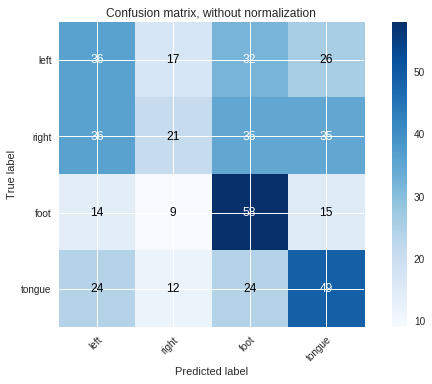

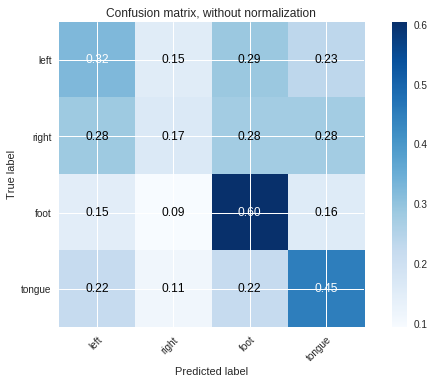

In [149]:
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, y_pred, classes=class_names,normalize=True,
                      title='Confusion matrix, without normalization')

# Reconfiguring time bins to get different temporal resolution

# Durations of each trial in seconds to try. (By default, 1000 time bins per trial at 250 Hz gives 4 sec of data per trial)
trial_durations = [0.5, 1, 2, 4] # Can't get more than 4 seconds of data from each trial!!

# When evaluating how well a 2 second trial does, should you use the same number of time bins (1000) but with 
# smaller amounts of time per time bin? Or use 2000 time bins since you now have twice the samples? ... 

#time_bins = [int(1000*(4/trial_duration)) for trial_duration in trial_durations]
time_bins = [int(250*trial_duration) for trial_duration in trial_durations]

print(time_bins)


for time_bin in time_bins:
    # data
    X_train_valid
    
    # def model 
    
    
    # train 
    
    
    # test
    
    